### Книга ML Python
Пример 1 - Ирис

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_dataset = load_iris()

In [5]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [6]:
print(iris_dataset.target_names)
print(iris_dataset.feature_names)
print("target", iris_dataset.target[2])
print("data", iris_dataset.data[2])


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
('target', 0)
('data', array([ 4.7,  3.2,  1.3,  0.2]))


In [7]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [8]:
print("Названия ответов: {}".format(iris_dataset['target_names']))

Названия ответов: ['setosa' 'versicolor' 'virginica']


In [9]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <type 'numpy.ndarray'>


In [10]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


- в машинном обучении отдельные элементы называются примерами ( samples ), 
- а их свойства – характеристиками или признаками ( feature ).
- Форма ( shape ) массива данных определяется количеством примеров, умноженным на количество признаков.

In [11]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


iris['target_names']: 0 – setosa , 1 – versicolor , а 2 – virginica. 

train_test_split разбивает данные на 
- обучающими данными ( training data ) или обучающим набором ( training set )  - 75%
- тестовыми данными ( test data ), на которых мы будем оценивать качество нашей модели -25%

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'], 
    random_state=0)

random_state - генератор псевдослучайных чисел - задаем всегда один и тот же, данные будут перемешаны

In [13]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)
форма массива X_test: (38, 4)
форма массива y_test: (38,)


### Исследование данных

визуаулизация  - диаграмму рассеяния ( scatter plot ) 
один признак откладывается по оси х, а другой признак – по оси у, но для большого числа признаков
строят матрицу диаграмм рассеяния ( scatterplot matrix ) 
или парные диаграммы рассеяния ( pair plots )



In [32]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import mglearn

import numpy as np

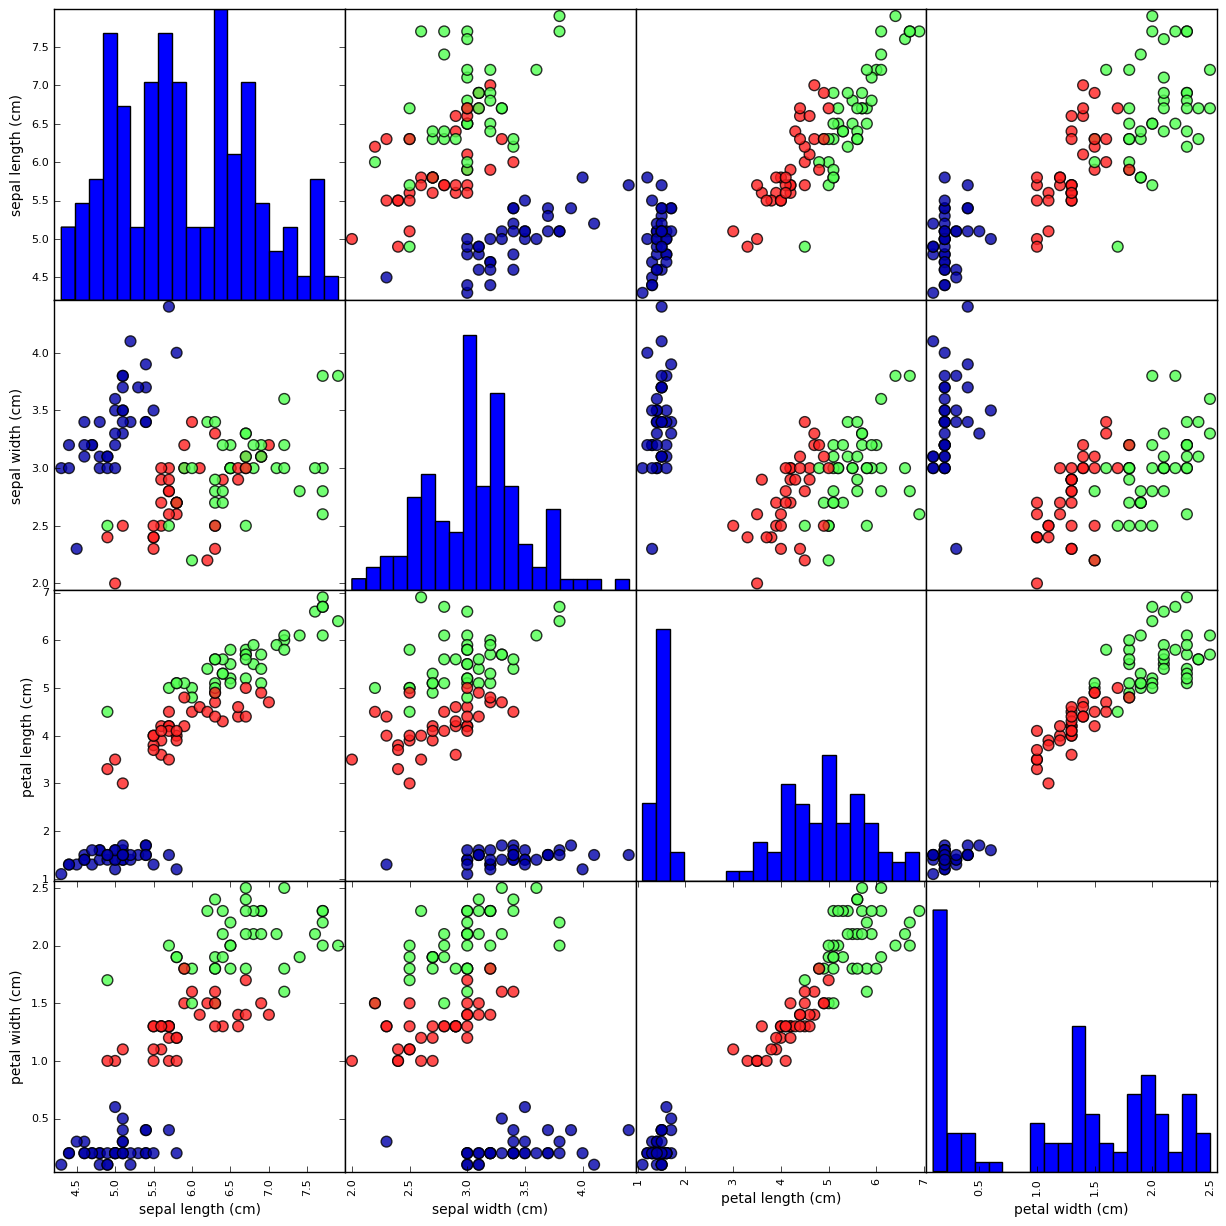

In [26]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.scatter_matrix(
    iris_dataframe, 
    c = y_train, 
    figsize = (15, 15), 
    marker = 'o', 
    hist_kwds = {'bins': 20}, 
    s = 60, 
    alpha = .8, 
    cmap = mglearn.cm3)

In [27]:
plt.savefig('foo.png')

### k ближайших соседей
В scikit-learn все модели машинного обучения реализованы в собственных классах, называемых классами Estimator. Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
# для обучения просто вызываем метод fit
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
# попробуем запросить к какому классу относится наш произвольный инис
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(iris_dataset['target_names'][prediction]))

форма массива X_new: (1, 4)
Прогноз: [0]
Спрогнозированная метка: ['setosa']


### Оценка качества модели
правильность ( accuracy ) – процент, для которых модель правильно спрогнозировала сорт

In [36]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [37]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97
